In this notebook we will compare the MBR scores calculated with the monte-carlo estimates and those from the predictive model
We will try to analyse failure points and think about how to tackle those.



In [1]:
# Some setup code for imports
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from custom_datasets.BayesRiskDatasetLoader import BayesRiskDatasetLoader


In [2]:

# First we will load the test set with the calculated scores.
dataset_loader = BayesRiskDatasetLoader("validation_predictive", n_hypotheses=100, n_references=1000, sampling_method='ancestral')
dataset = dataset_loader.load(type="pandas")

In [3]:
# We will visualize the scores as



In [4]:
import numpy as np
def calculate_mbr_scores(entry, n_references=1000):
    scores = []
    count = np.sum(entry["utilities_count"])
    for hyp, util in zip(entry["hypotheses"], entry["utilities"]):
        score = np.sum(util* entry["utilities_count"])/count
        scores.append(score)
    return scores

In [5]:
entry_id=5
entry = dataset.data.iloc[entry_id]
scores = calculate_mbr_scores(entry)

print(scores)

[0.976936238013208, 1.0442413221094757, 1.0434949790239334, 0.4977993944268674, 1.0243594698756933, 0.7273990536890924, 0.5783227259870618, -1.04294151699543, 0.6881924784816802, 0.7469194515123964]


In [6]:
### Next up we will read the trained model and calculate the score given by the heads
from models.pl_predictive.PLPredictiveModelFactory import PLPredictiveModelFactory
path = "C:/Users/gerso/FBR/predictive/tatoeba-de-en/models/mixture_model_2/"
model, factory = PLPredictiveModelFactory.load(path)

C:\Users\gerso\FBR\NMT/tatoeba-de-en/model
1.001726887106992e-06
using a mixture model


In [7]:
from models.MBR_model.GaussianMixtureMBRModel import GaussianMixtureMBRModel
wrapped_model = GaussianMixtureMBRModel(model)

In [8]:
from tqdm import tqdm
all_scores = []
for i, row in tqdm(dataset.data.iterrows(), total=dataset.data.shape[0]):
    source = row["source"]
    hypotheses = list(row["hypotheses"])
    print(len(hypotheses))
    scores = wrapped_model.get_scores([source]* len(hypotheses), hypotheses).tolist()
    all_scores.append(scores)
    
    if i > 200:
        break


  0%|                                                                                         | 0/2500 [00:00<?, ?it/s]

11


C:\Users\gerso\projects\master-thesis\models\MBR_model\GaussianMixtureMBRModel.py:40: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ..\torch\csrc\utils\tensor_new.cpp:201.)
  result = {k: torch.tensor(v) for k, v in result.items()}
  0%|                                                                               | 1/2500 [00:04<3:02:15,  4.38s/it]

torch.Size([11, 1000])
14
torch.Size([14, 1000])
6
torch.Size([6, 1000])
4
torch.Size([4, 1000])
100


  0%|▏                                                                                | 5/2500 [00:04<28:59,  1.43it/s]

torch.Size([100, 1000])
10
torch.Size([10, 1000])
23
torch.Size([23, 1000])
8
torch.Size([8, 1000])
93
torch.Size([93, 1000])


  0%|▎                                                                                | 9/2500 [00:04<14:08,  2.94it/s]

5
torch.Size([5, 1000])
20
torch.Size([20, 1000])
11
torch.Size([11, 1000])
100


  1%|▌                                                                               | 16/2500 [00:05<06:40,  6.21it/s]

torch.Size([100, 1000])
12
torch.Size([12, 1000])
4
torch.Size([4, 1000])
50
torch.Size([50, 1000])
95


  1%|▌                                                                               | 18/2500 [00:05<06:28,  6.39it/s]

torch.Size([95, 1000])
95
torch.Size([95, 1000])
96


  1%|▋                                                                               | 20/2500 [00:05<05:57,  6.94it/s]

torch.Size([96, 1000])
2
torch.Size([2, 1000])
3
torch.Size([3, 1000])
18
torch.Size([18, 1000])
85
torch.Size([85, 1000])


  1%|▋                                                                               | 23/2500 [00:05<04:49,  8.57it/s]

9
torch.Size([9, 1000])
16
torch.Size([16, 1000])
100


  1%|▉                                                                               | 28/2500 [00:06<04:03, 10.17it/s]

torch.Size([100, 1000])
4
torch.Size([4, 1000])
98
torch.Size([98, 1000])
98


  1%|▉                                                                               | 30/2500 [00:06<04:03, 10.15it/s]

torch.Size([98, 1000])
2
torch.Size([2, 1000])
8
torch.Size([8, 1000])
96
torch.Size([96, 1000])


  1%|█▏                                                                              | 36/2500 [00:06<02:49, 14.52it/s]

10
torch.Size([10, 1000])
2
torch.Size([2, 1000])
7
torch.Size([7, 1000])
58
torch.Size([58, 1000])
100


  2%|█▎                                                                              | 41/2500 [00:06<02:24, 17.00it/s]

torch.Size([100, 1000])
12
torch.Size([12, 1000])
20
torch.Size([20, 1000])
1
torch.Size([1, 1000])
20
torch.Size([20, 1000])
100


  2%|█▍                                                                              | 43/2500 [00:07<02:56, 13.94it/s]

torch.Size([100, 1000])
34
torch.Size([34, 1000])
18
torch.Size([18, 1000])
91


  2%|█▌                                                                              | 47/2500 [00:07<03:12, 12.75it/s]

torch.Size([91, 1000])
4
torch.Size([4, 1000])
95
torch.Size([95, 1000])
3
torch.Size([3, 1000])
9
torch.Size([9, 1000])


  2%|█▋                                                                              | 52/2500 [00:07<02:16, 17.99it/s]

6
torch.Size([6, 1000])
2
torch.Size([2, 1000])
61
torch.Size([61, 1000])
10
torch.Size([10, 1000])
100


  2%|█▊                                                                              | 56/2500 [00:08<02:40, 15.23it/s]

torch.Size([100, 1000])
89
torch.Size([89, 1000])
4
torch.Size([4, 1000])
68


  2%|█▊                                                                              | 58/2500 [00:08<02:37, 15.51it/s]

torch.Size([68, 1000])
4
torch.Size([4, 1000])
100
torch.Size([100, 1000])


  2%|█▉                                                                              | 60/2500 [00:08<03:44, 10.88it/s]

100
torch.Size([100, 1000])
100


  2%|█▉                                                                              | 62/2500 [00:08<04:15,  9.52it/s]

torch.Size([100, 1000])
99
torch.Size([99, 1000])
29
torch.Size([29, 1000])
100


  3%|██                                                                              | 66/2500 [00:09<03:43, 10.91it/s]

torch.Size([100, 1000])
96
torch.Size([96, 1000])
1
torch.Size([1, 1000])
11
torch.Size([11, 1000])
3
torch.Size([3, 1000])
12
torch.Size([12, 1000])


  3%|██▏                                                                             | 70/2500 [00:09<02:35, 15.63it/s]

40
torch.Size([40, 1000])
33
torch.Size([33, 1000])
95


  3%|██▎                                                                             | 74/2500 [00:09<02:49, 14.29it/s]

torch.Size([95, 1000])
2
torch.Size([2, 1000])
74
torch.Size([74, 1000])
51


  3%|██▍                                                                             | 76/2500 [00:09<03:19, 12.18it/s]

torch.Size([51, 1000])
99
torch.Size([99, 1000])
6
torch.Size([6, 1000])
8
torch.Size([8, 1000])
100


  3%|██▌                                                                             | 81/2500 [00:10<03:03, 13.17it/s]

torch.Size([100, 1000])
100
torch.Size([100, 1000])
10
torch.Size([10, 1000])
59


  3%|██▋                                                                             | 83/2500 [00:10<03:24, 11.80it/s]

torch.Size([59, 1000])
92
torch.Size([92, 1000])
9
torch.Size([9, 1000])
100


  3%|██▊                                                                             | 87/2500 [00:10<03:14, 12.42it/s]

torch.Size([100, 1000])
3
torch.Size([3, 1000])
93
torch.Size([93, 1000])
4
torch.Size([4, 1000])
31
torch.Size([31, 1000])
4
torch.Size([4, 1000])
100


  4%|██▉                                                                             | 93/2500 [00:11<02:55, 13.70it/s]

torch.Size([100, 1000])
11
torch.Size([11, 1000])
69
torch.Size([69, 1000])
93


  4%|███                                                                             | 95/2500 [00:11<03:27, 11.61it/s]

torch.Size([93, 1000])
97
torch.Size([97, 1000])
18
torch.Size([18, 1000])
23
torch.Size([23, 1000])


  4%|███▏                                                                            | 99/2500 [00:11<02:26, 16.37it/s]

4
torch.Size([4, 1000])
9
torch.Size([9, 1000])
85
torch.Size([85, 1000])
98


  4%|███▏                                                                           | 101/2500 [00:11<03:07, 12.76it/s]

torch.Size([98, 1000])
4
torch.Size([4, 1000])
9
torch.Size([9, 1000])
16
torch.Size([16, 1000])
3
torch.Size([3, 1000])
98


  4%|███▍                                                                           | 110/2500 [00:12<02:12, 18.07it/s]

torch.Size([98, 1000])
20
torch.Size([20, 1000])
2
torch.Size([2, 1000])
13
torch.Size([13, 1000])
19
torch.Size([19, 1000])
6
torch.Size([6, 1000])
100


  5%|███▌                                                                           | 113/2500 [00:12<02:23, 16.67it/s]

torch.Size([100, 1000])
5
torch.Size([5, 1000])
95
torch.Size([95, 1000])
89


  5%|███▋                                                                           | 118/2500 [00:12<02:34, 15.43it/s]

torch.Size([89, 1000])
41
torch.Size([41, 1000])
14
torch.Size([14, 1000])
41
torch.Size([41, 1000])
67


  5%|███▊                                                                           | 120/2500 [00:12<02:31, 15.72it/s]

torch.Size([67, 1000])
5
torch.Size([5, 1000])
12
torch.Size([12, 1000])
99
torch.Size([99, 1000])


  5%|███▉                                                                           | 124/2500 [00:13<02:49, 14.01it/s]

3
torch.Size([3, 1000])
96
torch.Size([96, 1000])
28
torch.Size([28, 1000])


  5%|████                                                                           | 127/2500 [00:13<02:22, 16.60it/s]

10
torch.Size([10, 1000])
36
torch.Size([36, 1000])
100


  5%|████                                                                           | 129/2500 [00:13<03:13, 12.26it/s]

torch.Size([100, 1000])
100
torch.Size([100, 1000])
8
torch.Size([8, 1000])


  5%|████▏                                                                          | 132/2500 [00:13<02:55, 13.50it/s]

7
torch.Size([7, 1000])
98
torch.Size([98, 1000])
5
torch.Size([5, 1000])
61


  5%|████▎                                                                          | 135/2500 [00:13<02:26, 16.09it/s]

torch.Size([61, 1000])
9
torch.Size([9, 1000])
100
torch.Size([100, 1000])
32
torch.Size([32, 1000])


  6%|████▍                                                                          | 142/2500 [00:14<01:50, 21.38it/s]

9
torch.Size([9, 1000])
6
torch.Size([6, 1000])
5
torch.Size([5, 1000])
30
torch.Size([30, 1000])
3
torch.Size([3, 1000])
90


  6%|████▋                                                                          | 148/2500 [00:14<01:44, 22.58it/s]

torch.Size([90, 1000])
9
torch.Size([9, 1000])
7
torch.Size([7, 1000])
38
torch.Size([38, 1000])
6
torch.Size([6, 1000])
17
torch.Size([17, 1000])
32
torch.Size([32, 1000])


  6%|████▊                                                                          | 151/2500 [00:14<01:41, 23.24it/s]

31
torch.Size([31, 1000])
25
torch.Size([25, 1000])
75
torch.Size([75, 1000])
70


  6%|████▊                                                                          | 154/2500 [00:14<02:02, 19.10it/s]

torch.Size([70, 1000])
5
torch.Size([5, 1000])
81
torch.Size([81, 1000])
67


  6%|████▉                                                                          | 157/2500 [00:15<02:57, 13.19it/s]

torch.Size([67, 1000])
99
torch.Size([99, 1000])
100


  6%|█████                                                                          | 159/2500 [00:15<03:17, 11.87it/s]

torch.Size([100, 1000])
50
torch.Size([50, 1000])
16
torch.Size([16, 1000])
70
torch.Size([70, 1000])


  7%|█████▏                                                                         | 165/2500 [00:15<02:18, 16.83it/s]

32
torch.Size([32, 1000])
10
torch.Size([10, 1000])
6
torch.Size([6, 1000])
45
torch.Size([45, 1000])
86


  7%|█████▎                                                                         | 168/2500 [00:15<02:43, 14.23it/s]

torch.Size([86, 1000])
6
torch.Size([6, 1000])
100
torch.Size([100, 1000])
69


  7%|█████▌                                                                         | 175/2500 [00:16<01:52, 20.68it/s]

torch.Size([69, 1000])
8
torch.Size([8, 1000])
1
torch.Size([1, 1000])
8
torch.Size([8, 1000])
29
torch.Size([29, 1000])
4
torch.Size([4, 1000])
14
torch.Size([14, 1000])
6
torch.Size([6, 1000])
11
torch.Size([11, 1000])


  7%|█████▊                                                                         | 184/2500 [00:16<01:18, 29.43it/s]

20
torch.Size([20, 1000])
4
torch.Size([4, 1000])
5
torch.Size([5, 1000])
8
torch.Size([8, 1000])
8
torch.Size([8, 1000])
18
torch.Size([18, 1000])
8
torch.Size([8, 1000])
14
torch.Size([14, 1000])


  8%|█████▉                                                                         | 188/2500 [00:16<01:15, 30.79it/s]

21
torch.Size([21, 1000])
4
torch.Size([4, 1000])
18
torch.Size([18, 1000])
27
torch.Size([27, 1000])
73


  8%|██████                                                                         | 192/2500 [00:16<01:27, 26.39it/s]

torch.Size([73, 1000])
44
torch.Size([44, 1000])
12
torch.Size([12, 1000])
98
torch.Size([98, 1000])


  8%|██████▏                                                                        | 195/2500 [00:16<01:38, 23.46it/s]

5
torch.Size([5, 1000])
1
torch.Size([1, 1000])
24
torch.Size([24, 1000])
45
torch.Size([45, 1000])
100


  8%|██████▎                                                                        | 198/2500 [00:17<02:00, 19.07it/s]

torch.Size([100, 1000])
4
torch.Size([4, 1000])
96
torch.Size([96, 1000])
79


  8%|██████▎                                                                        | 201/2500 [00:17<03:19, 11.54it/s]

torch.Size([79, 1000])
7
torch.Size([7, 1000])


In [9]:
print(len(all_scores[10]))

20


In [10]:
import matplotlib.pyplot as plt
def clean(s):
    return s.replace('?', '')

def compare_scores(source, target, hypotheses, monte_carlo_scores, predicted_scores, max_show=15, labels=("Monte Carlo", "predicted"), colors=("b", "r"), save=False):
    
    # First we sort based on scores 1
    #First we show the 
    cleaned_source = clean(source)
    cleaned_target = clean(target)
    
    sorted_indices = np.argsort(-monte_carlo_scores)
    
    monte_carlo_1_sorted = monte_carlo_scores[sorted_indices][:max_show]
    predicted_scores_1_sorted = predicted_scores[sorted_indices][:max_show]
    hypotheses_sorted = hypotheses[sorted_indices][:max_show]


    plt.rcdefaults()
    fig, ax = plt.subplots()
        
    
    y_pos = np.arange(len(hypotheses_sorted))
    
    width=0.35

    ax.barh(y_pos - width/2, monte_carlo_1_sorted, width, align='center', color=colors[0], label=labels[0])
    ax.barh(y_pos + width/2, predicted_scores_1_sorted, width, align='center', color=colors[1], label=labels[1])
    
    ax.set_yticks(y_pos, labels=hypotheses_sorted)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('scores')
    ax.set_title('MBR scores sorted on Monte-Carlo: \n {} \n {}'.format(source, target))
    ax.legend()
    
    fig.tight_layout()
    
    if save:
        plt.savefig('{}_{}_{}.png'.format(cleaned_source, cleaned_target, "monte_carlo"), bbox_inches="tight")
    
    plt.show()
   
    
    sorted_indices = np.argsort(-predicted_scores)
    
    monte_carlo_1_sorted = monte_carlo_scores[sorted_indices][:max_show]
    predicted_scores_1_sorted = predicted_scores[sorted_indices][:max_show]
    hypotheses_sorted = hypotheses[sorted_indices][:max_show]
    
    
    plt.rcdefaults()
    fig, ax = plt.subplots()
        
    
    y_pos = np.arange(len(hypotheses_sorted))
    
    width=0.35

    ax.barh(y_pos - width/2, monte_carlo_1_sorted, width, align='center', color=colors[0], label=labels[0])
    ax.barh(y_pos + width/2, predicted_scores_1_sorted, width, align='center', color=colors[1], label=labels[1])
    
    ax.set_yticks(y_pos, labels=hypotheses_sorted)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('scores')
    ax.set_title('MBR scores sorted on predicted: \n {} \n {}'.format(source, target))
    ax.legend()
    fig.tight_layout()
    if save:
        plt.savefig('{}_{}_{}.png'.format(cleaned_source, cleaned_target, "predictive"))
    plt.show()

In [11]:
def compare_random_scores(data, predictive_scores, n_examples=5, seed=1):
    np.random.seed(seed)
    indices = np.random.choice(len(all_scores), size=n_examples)
    
    for i in indices:
        entry = data.iloc[i]
        compare_scores(entry["source"], entry["target"], np.array(entry["hypotheses"]),   np.array(calculate_mbr_scores(entry)), np.array(all_scores[i]), labels=["Monte carlo", 'predicted'], save=True)
    
    

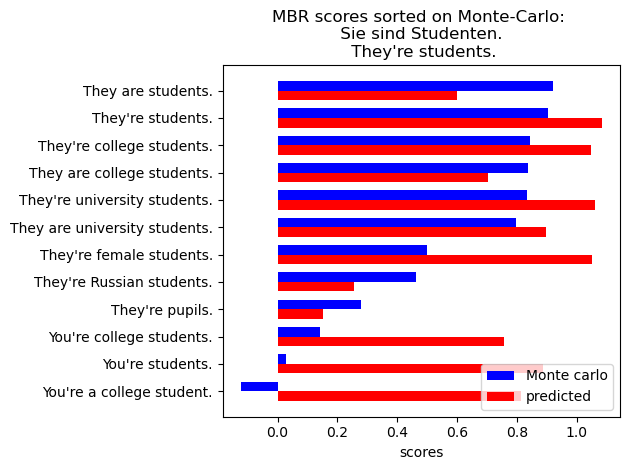

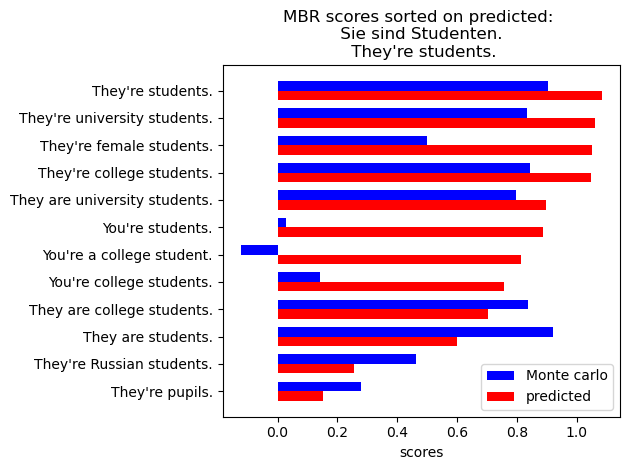

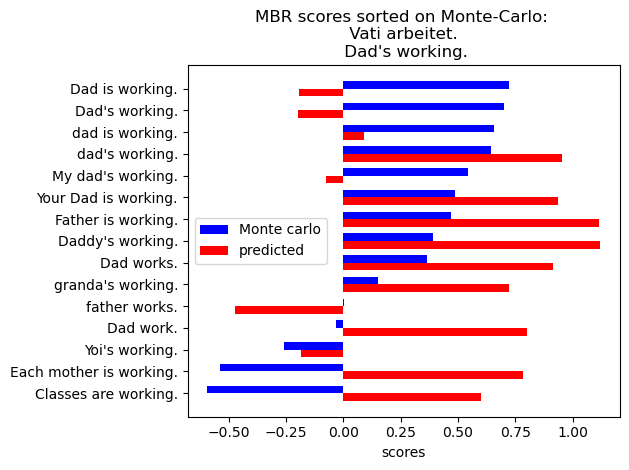

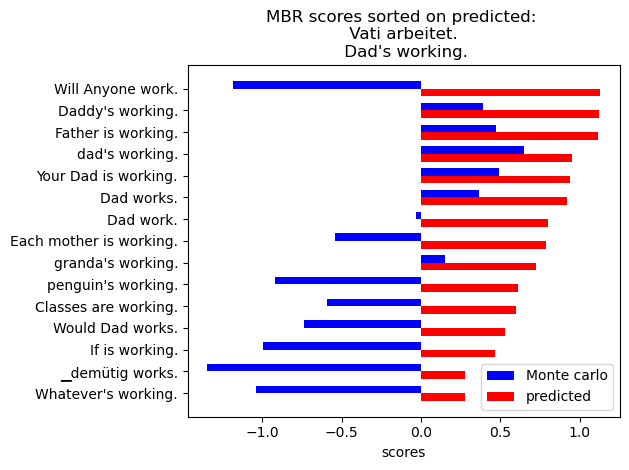

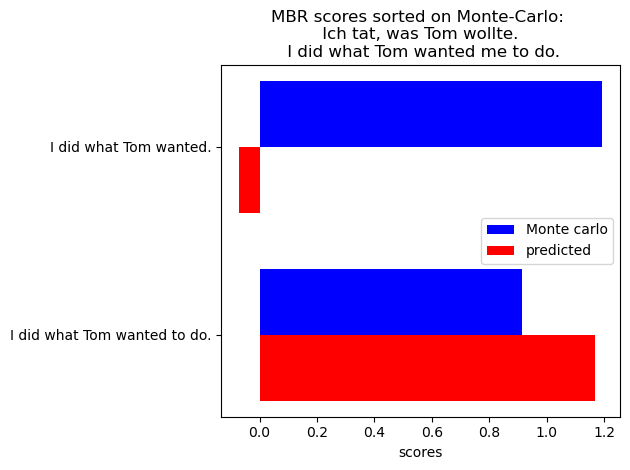

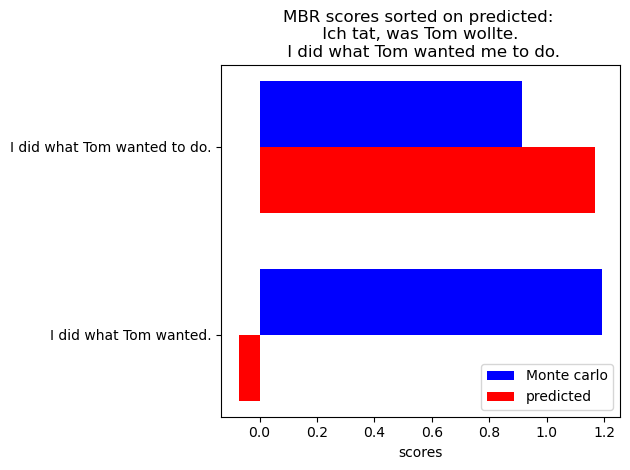

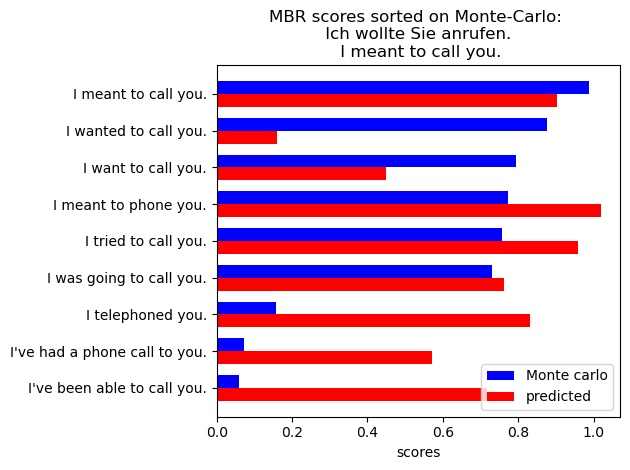

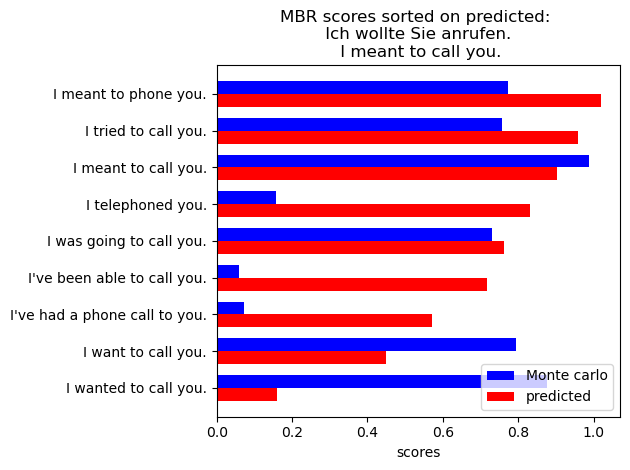

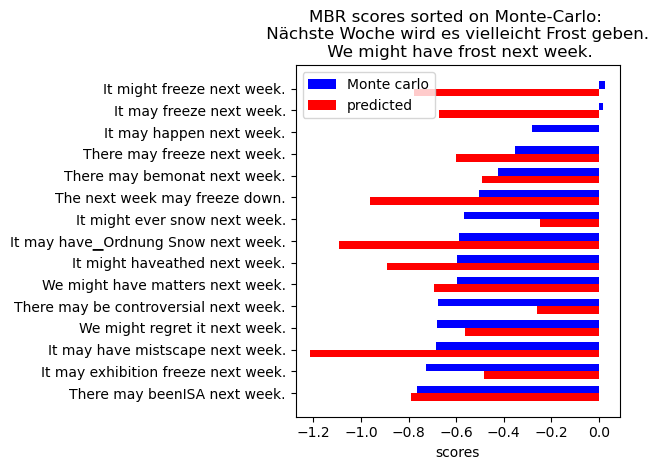

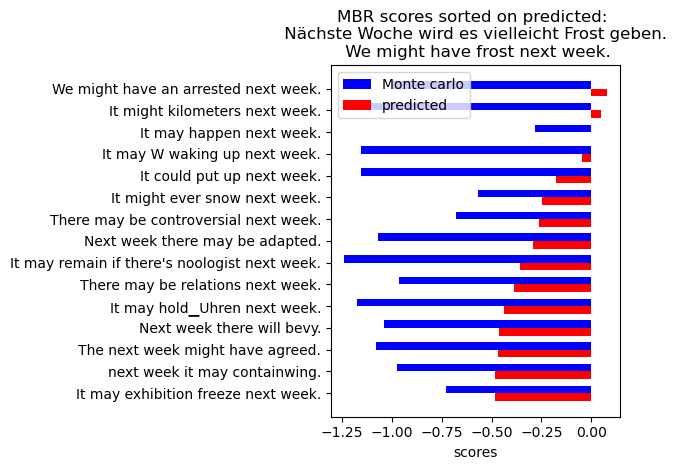

In [12]:
compare_random_scores(dataset.data, all_scores)

In [13]:
reference_scores = []
for i, row in dataset.data.iterrows():
    reference_scores.append(np.array(calculate_mbr_scores(row)))


In [14]:
## Next up we check if we are optimistic or pessimistic.

def calc_opt_statistics(predicted_scores, reference_scores):
    opt_count = 0
    pes_count = 0
    opt_sum = 0
    pes_sum = 0
    for pred_score, ref_score in zip(predicted_scores, reference_scores):
        larger = pred_score >= ref_score
        smaller = ref_score > pred_score
        opt_count += sum(larger)
        pes_count += sum(smaller)
        opt_sum += sum((pred_score - ref_score) * larger)
        pes_sum += sum((ref_score - pred_score) * smaller)
    total = opt_count + pes_count
    opt_percentage = opt_count/total
    pes_percentage = pes_count/total
    opt_avg = opt_sum/opt_count
    pes_avg = pes_sum/pes_count
        
    return {"opt_count": opt_count, "pes_count": pes_count, 
            "opt_sum": opt_sum, "pes_sum": pes_sum,
            "opt_percentage": opt_percentage,
            "pes_percentage": pes_percentage,
            "opt_avg": opt_avg,
            "pes_avg": pes_avg,
           }


In [15]:
statistics = calc_opt_statistics(all_scores, reference_scores)

In [16]:
statistics

{'opt_count': 4190,
 'pes_count': 3875,
 'opt_sum': 1845.919359520424,
 'pes_sum': 1569.4120740607718,
 'opt_percentage': 0.5195288282703038,
 'pes_percentage': 0.4804711717296962,
 'opt_avg': 0.44055354642492217,
 'pes_avg': 0.405009567499554}

In [17]:
### Here we get the predicted loc and scale for each sentence:
from tqdm import tqdm
all_model_out = []
for i, row in tqdm(dataset.data.iterrows(), total=dataset.data.shape[0]):
    source = row["source"]
    hypotheses = list(row["hypotheses"])

    model_out = wrapped_model.get_model_out([source]* len(hypotheses), hypotheses)
    all_model_out.append(model_out)
    if i > 200:
        break


  8%|██████▎                                                                        | 201/2500 [00:11<02:06, 18.19it/s]


In [18]:
def get_repeated_utils(utilities, count):
    
    repeated_utils = []
    for util in utilities:
        
        r = []
        for u, c in zip(util, count):
            r += [u] * c
        repeated_utils.append(r)
    return repeated_utils
    
    

In [19]:
# def Gauss(x, A, B):
#     y = A*np.exp(-1*B*x**2)
#     return y
import torch.distributions as td
import torch
def show_gaussian_mix(loc, scale, data, source, target, hypothesis, save=False, path='./imgs/'):

    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    
    cleaned_source = clean(source)
    cleaned_target = clean(target)
    cleaned_hypothesis = clean(hypothesis)
    
    # First plot the histogram
    ax.hist(data, 250, density=True, facecolor='g', alpha=0.75, label="scores")
    
    # Next up we plot the gaussian we tried to fit

    dists = []
    for l, s in zip(loc, scale):
        
        dist = td.Normal(l, s)
    
    
        x = torch.Tensor(np.linspace(l - 2* s, l + 2 * s, 100))
        probs = np.exp(dist.log_prob(x))
        ax.plot(x, probs, label="Predicted fit: \nLoc: {}, Scale: {}".format(str(round(l, 2)), str(round(s, 2))))
    
      
    middle_point = int(len(probs)/2)
    avg = np.mean(data)
    ax.scatter(avg, probs[middle_point], label="avg: {}".format(str(round(avg, 2))), marker="o")
    
   
    
    ax.set_xlabel('scores')
    ax.set_title('MBR scores histogram with Gaussian: \n {} \n {}'.format(source, hypothesis))
    ax.legend()
    fig.tight_layout()
    if save:
        plt.savefig('{}fitted_gaussian_{}_{}.png'.format(path, cleaned_source, cleaned_hypothesis))
    
    plt.show()



tensor([0.6603, 0.3397])


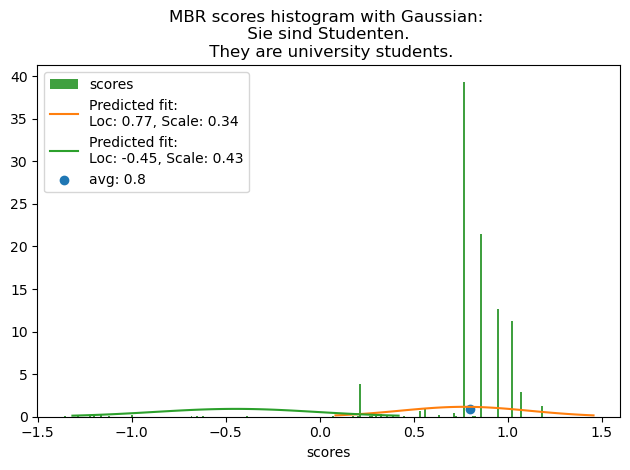

tensor([0.6603, 0.3397])


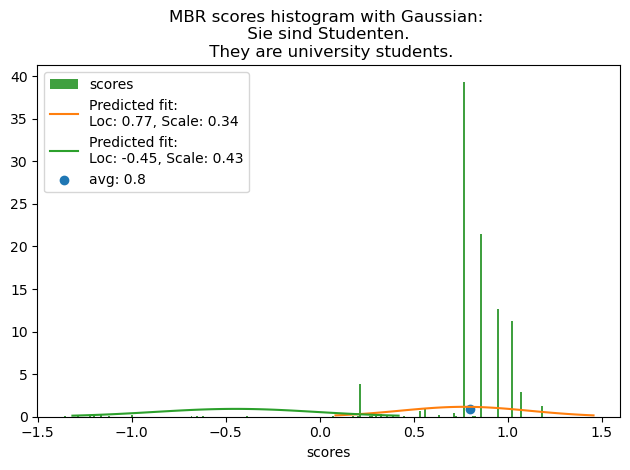

tensor([0.6573, 0.3427])


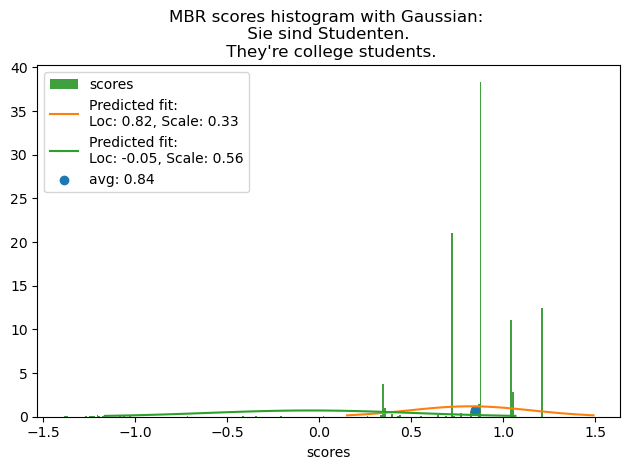

tensor([0.7536, 0.2464])


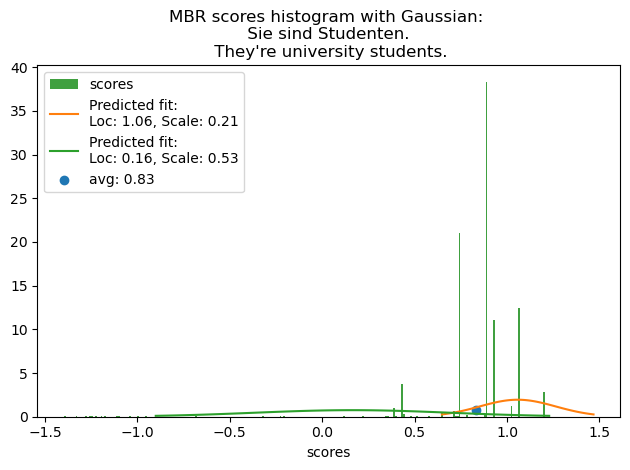

tensor([0.5909, 0.4091])


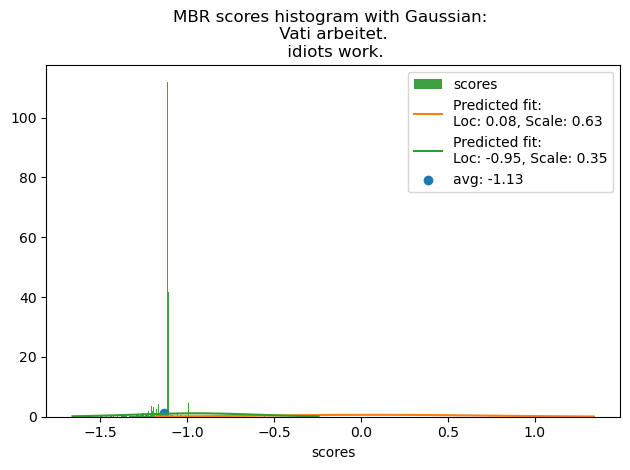

tensor([0.5839, 0.4161])


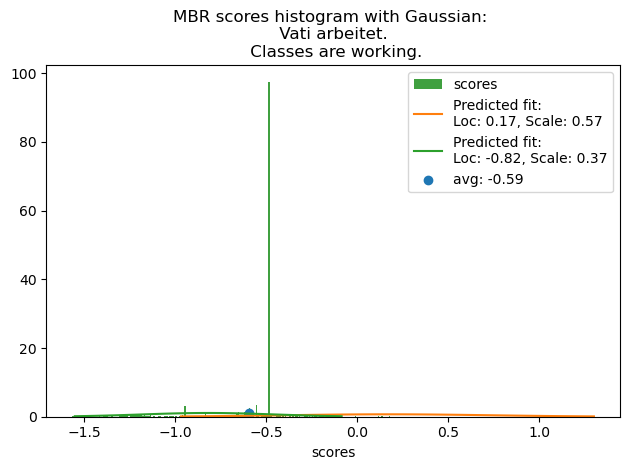

tensor([0.7941, 0.2059])


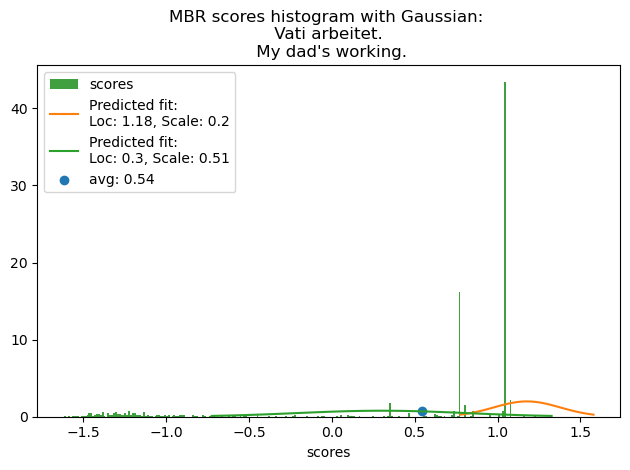

tensor([0.6797, 0.3203])


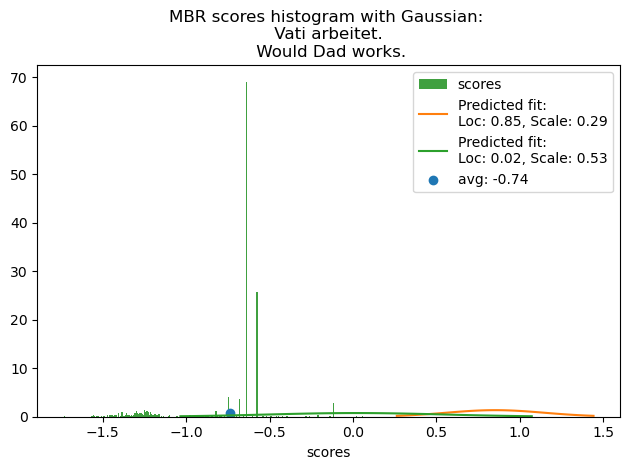

tensor([0.7045, 0.2955])


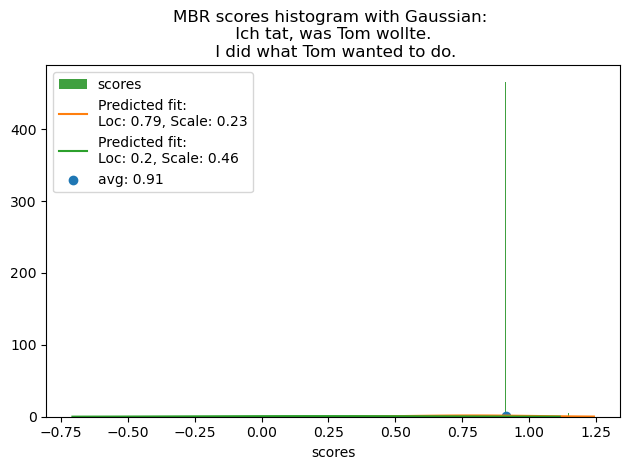

tensor([0.7045, 0.2955])


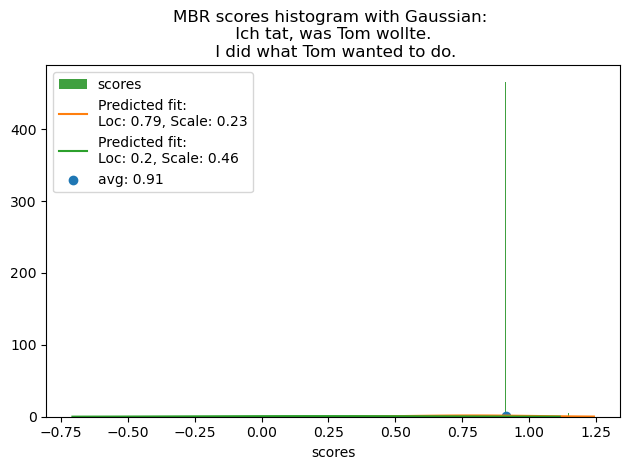

tensor([0.7045, 0.2955])


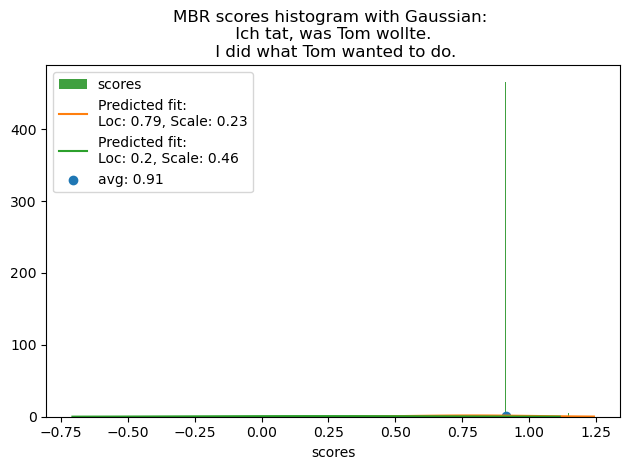

tensor([0.7148, 0.2852])


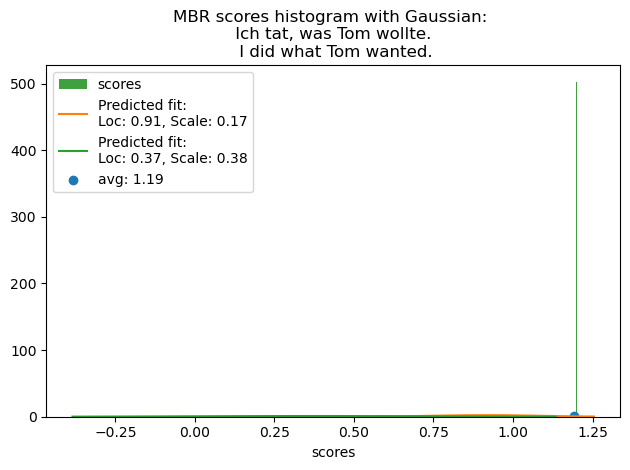

tensor([0.7623, 0.2377])


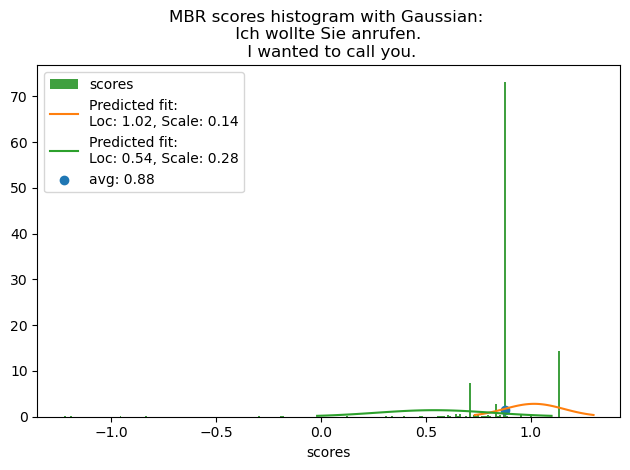

tensor([0.6599, 0.3401])


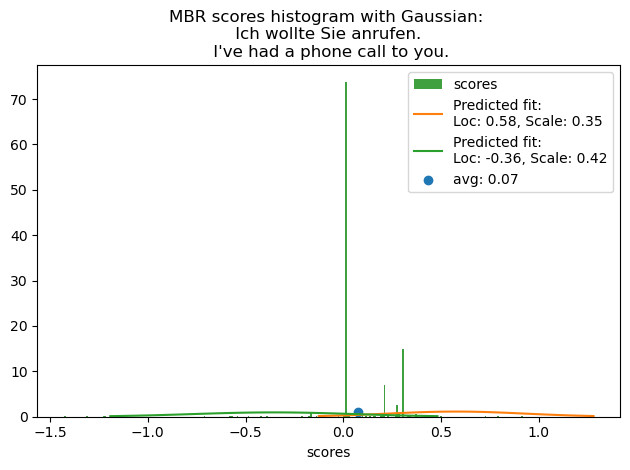

tensor([0.7623, 0.2377])


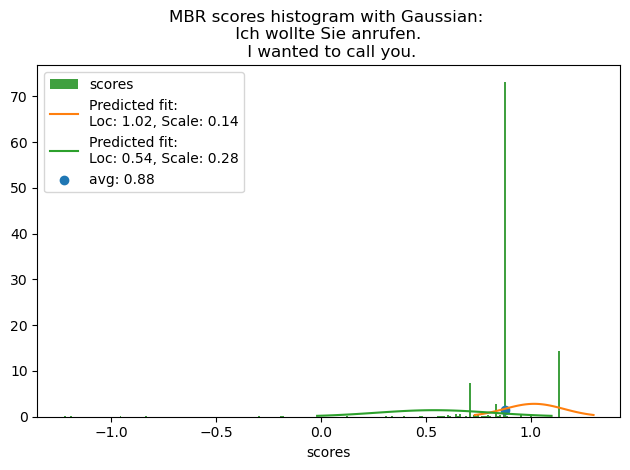

tensor([0.6599, 0.3401])


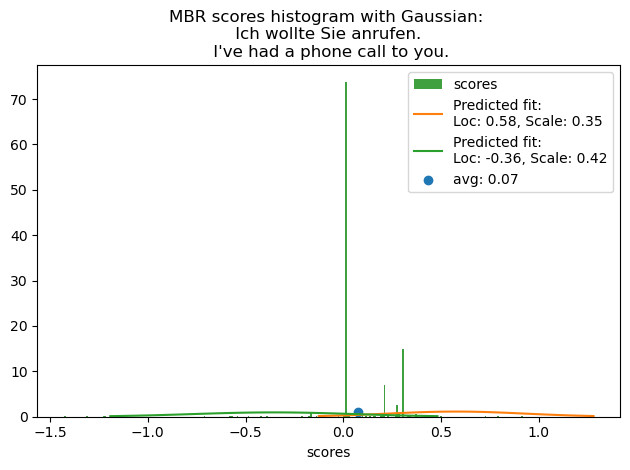

tensor([0.3907, 0.6093])


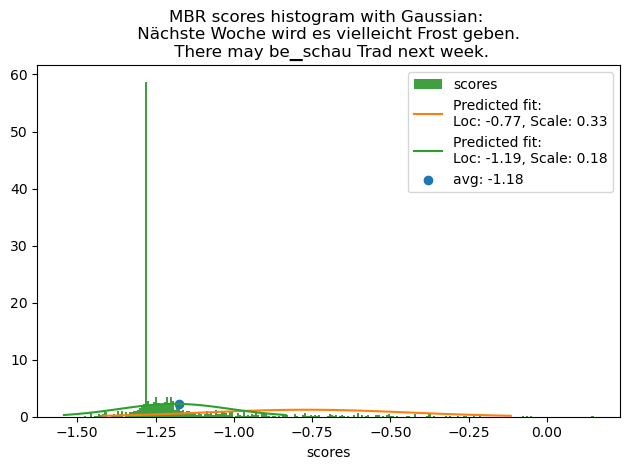

tensor([0.3907, 0.6093])


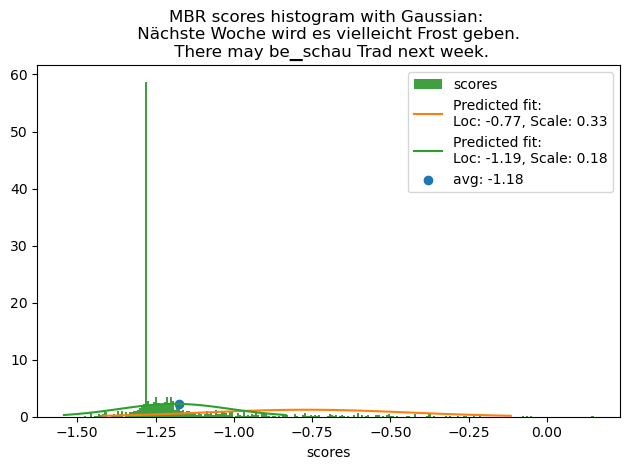

tensor([0.4847, 0.5153])


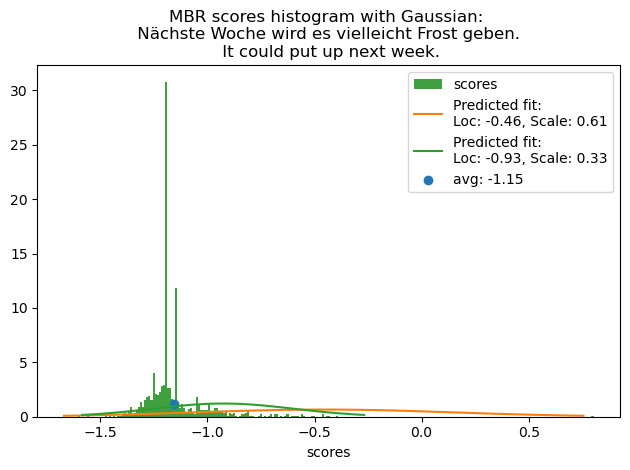

tensor([0.4588, 0.5412])


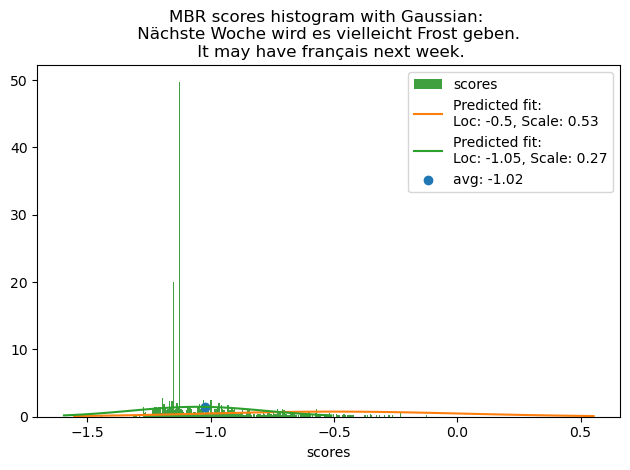

In [20]:
def compare_data_with_fit(data, fit, n_sources=5, n_hypotheses=4, seed=1):
    np.random.seed(seed)
    indices = np.random.choice(len(fit), size=n_sources)
    
    
    for i in indices:
        entry = data.iloc[i]
        repeated_utils = get_repeated_utils(entry["utilities"], entry["utilities_count"])
        hypotheses_indices = np.random.choice(len(entry["utilities"]), size=n_hypotheses)
        for hypothesis_index in hypotheses_indices:
            hypothesis = entry["hypotheses"][hypothesis_index]
            target = entry["target"]
            source = entry["source"]

            utils = repeated_utils[hypothesis_index]
            
            loc = fit[i]["loc"][hypothesis_index].tolist()
            scale = fit[i]["scale"][hypothesis_index].tolist()
            print(torch.softmax(fit[i]['logits'][hypothesis_index], dim=0))
            show_gaussian_mix(loc, scale, utils, source, target, hypothesis, save=True, path="./test_imgs/")

compare_data_with_fit(dataset.data, all_model_out, )      


In [21]:
#train dataset
dataset_loader = BayesRiskDatasetLoader("train_predictive", n_hypotheses=100, n_references=1000, sampling_method='ancestral')
dataset_train = dataset_loader.load(type="pandas")

tensor([0.6878, 0.3122])


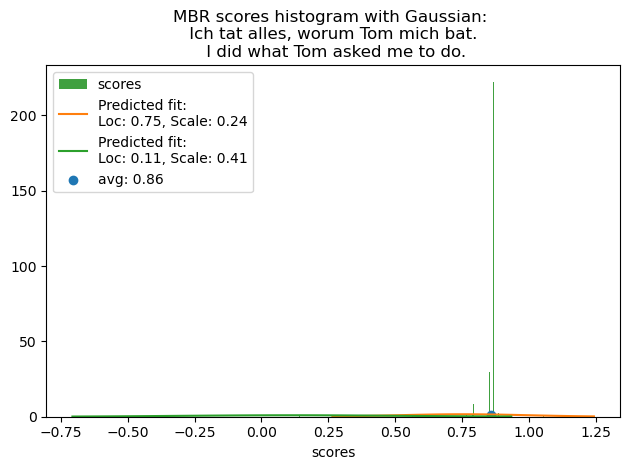

tensor([0.7686, 0.2314])


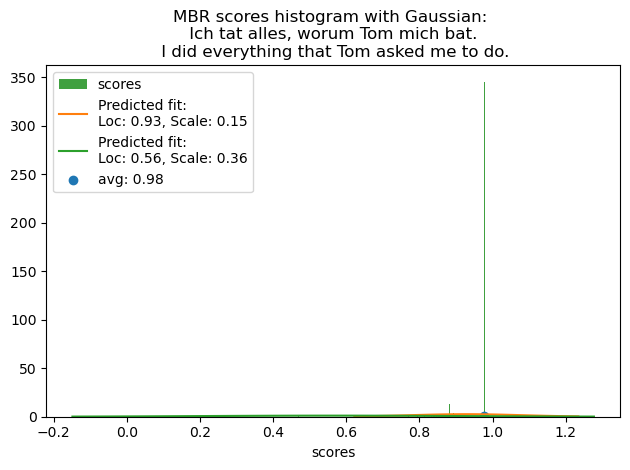

tensor([0.7686, 0.2314])


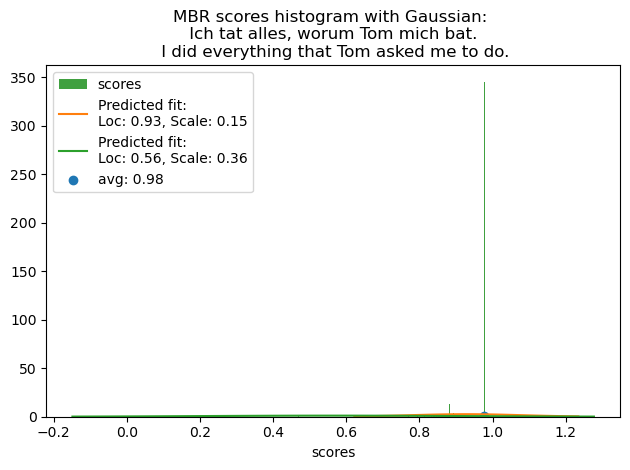

tensor([0.7693, 0.2307])


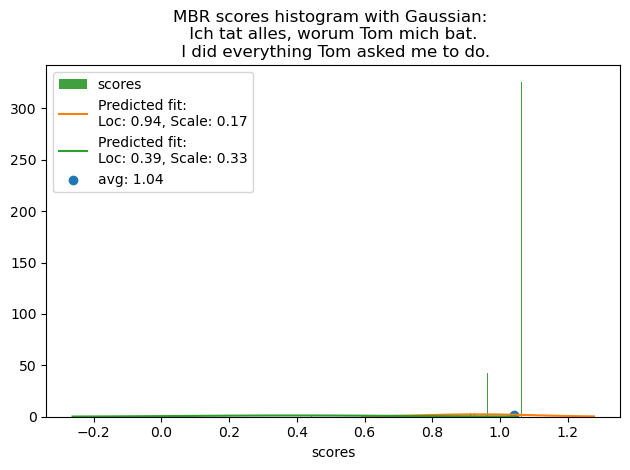

tensor([0.6416, 0.3584])


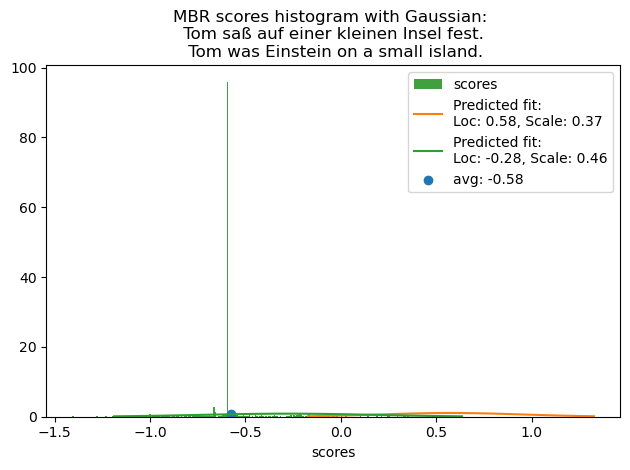

tensor([0.5918, 0.4082])


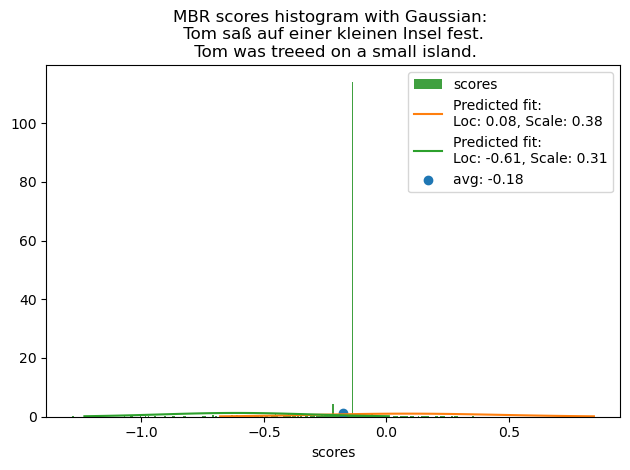

tensor([0.5329, 0.4671])


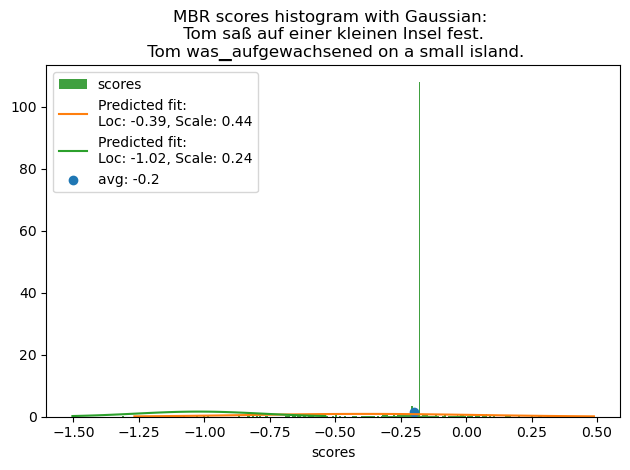

tensor([0.6416, 0.3584])


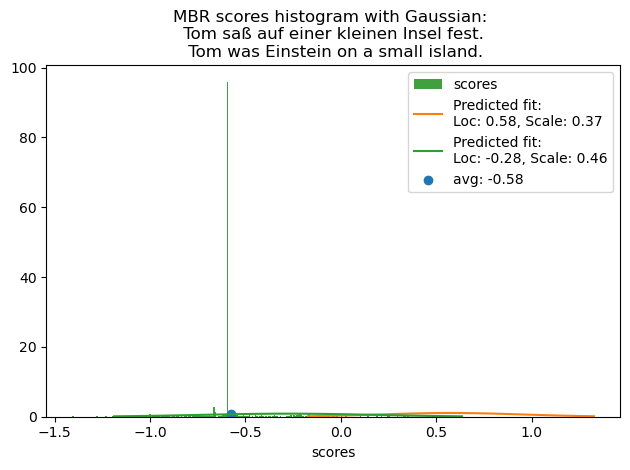

tensor([0.5266, 0.4734])


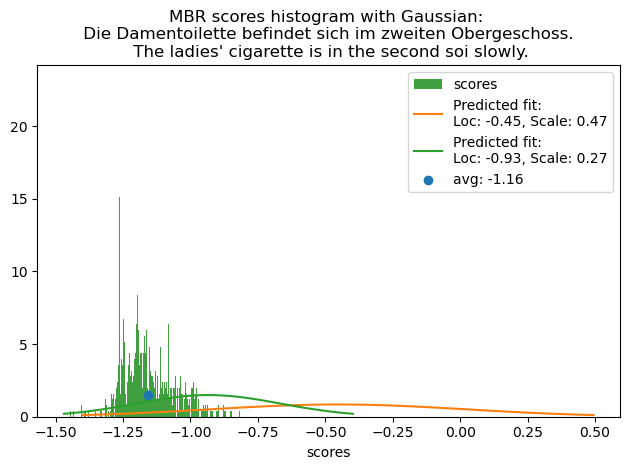

tensor([0.4509, 0.5491])


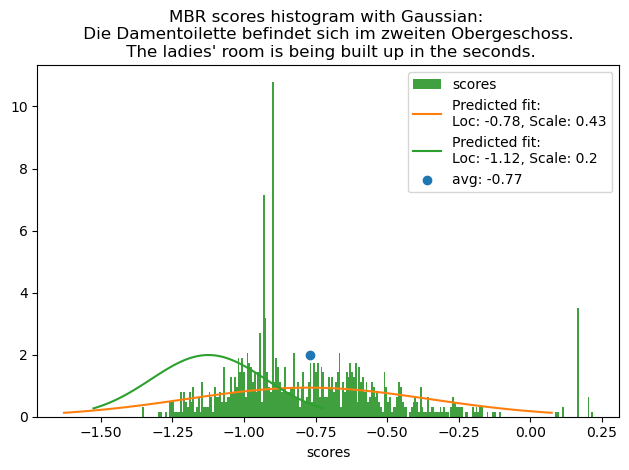

tensor([0.4527, 0.5473])


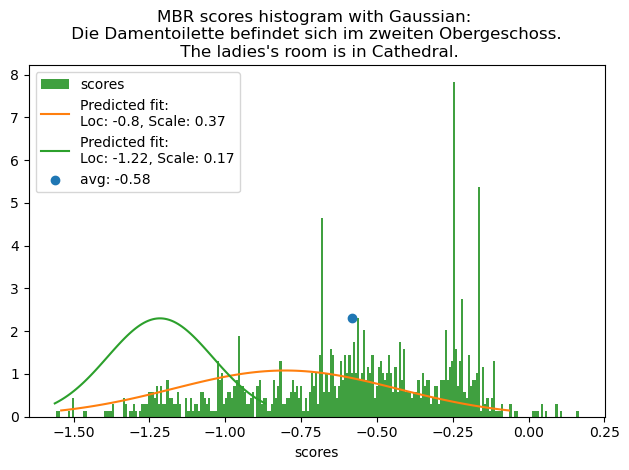

tensor([0.5664, 0.4336])


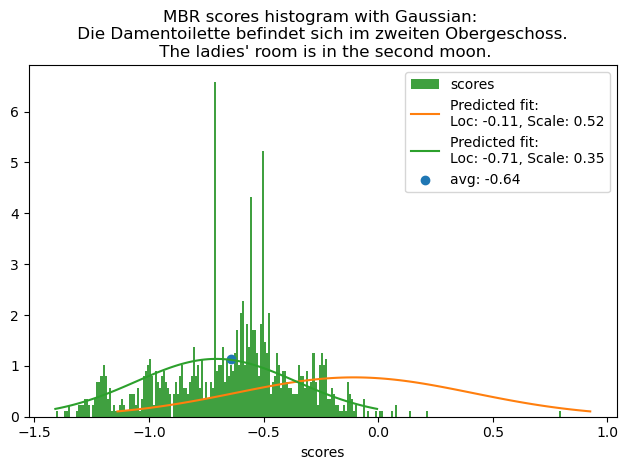

tensor([0.6313, 0.3687])


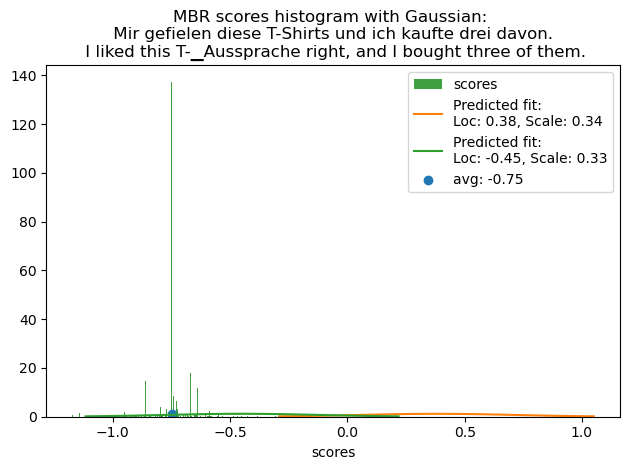

tensor([0.7020, 0.2980])


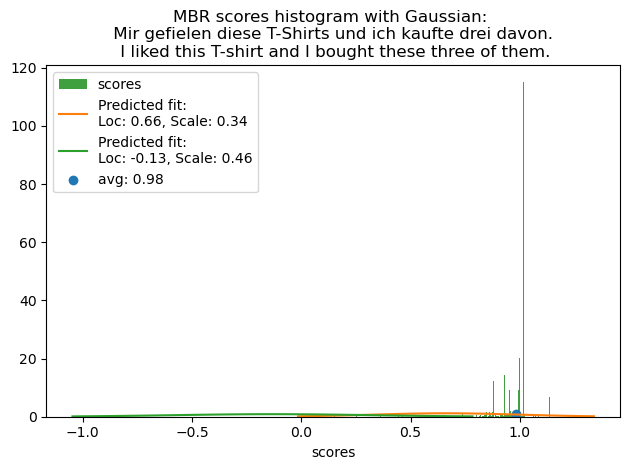

tensor([0.7661, 0.2339])


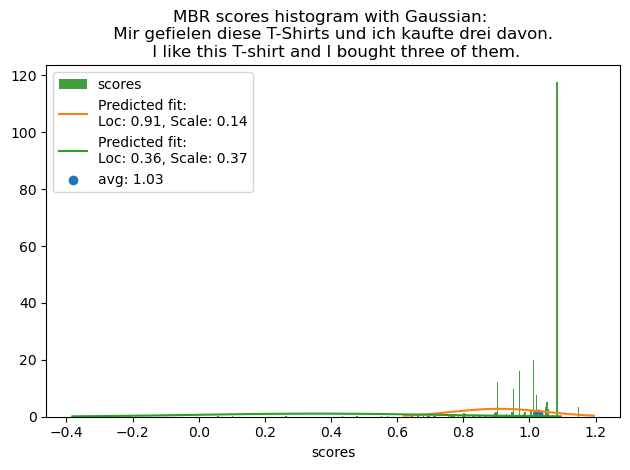

tensor([0.6610, 0.3390])


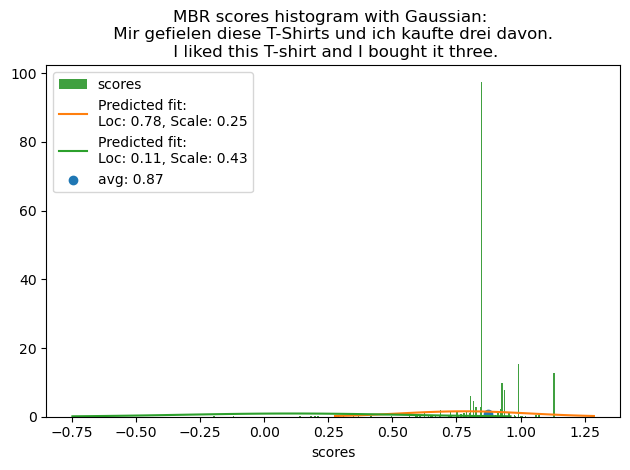

tensor([0.3749, 0.6251])


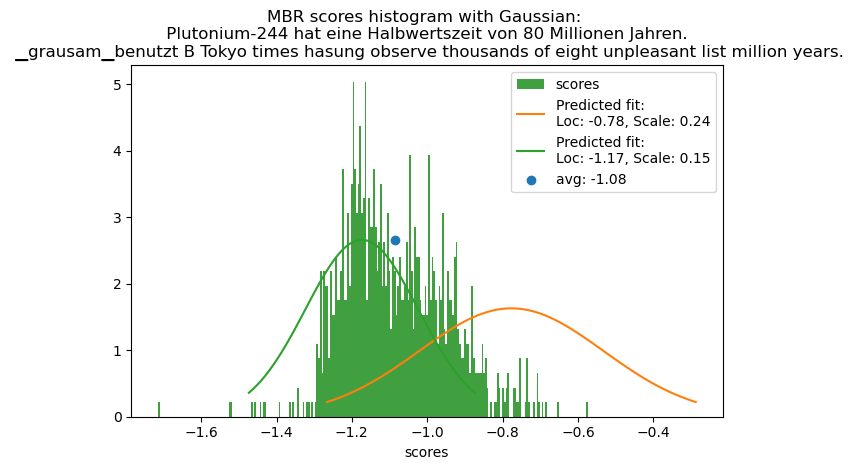

tensor([0.5087, 0.4913])


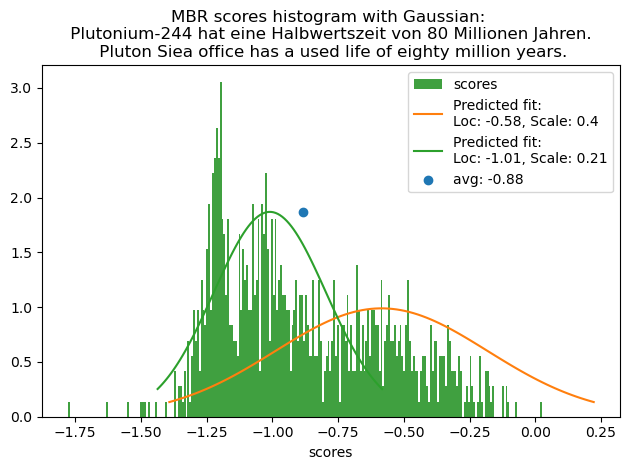

tensor([0.3914, 0.6086])


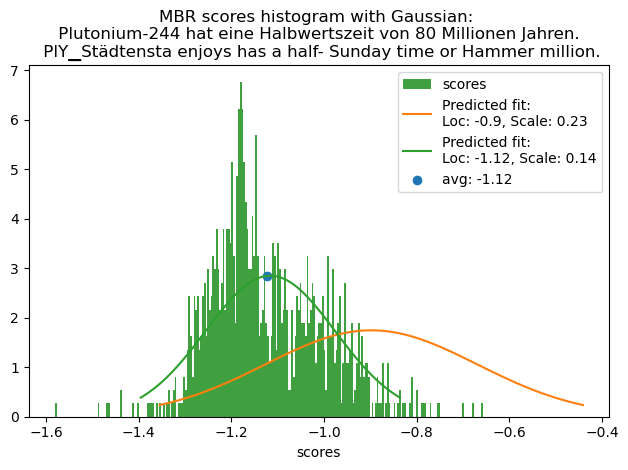

tensor([0.3346, 0.6654])


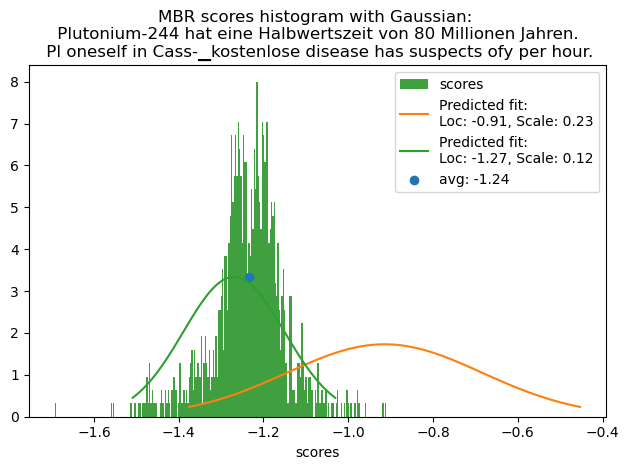

In [22]:
def compare_data_on_model(df, model, n_sources=5, n_hypotheses=4, seed=1):
    
    np.random.seed(seed)
    indices = np.random.choice(len(df["utilities"]), size=n_sources)
    
    for i in indices:
        row = df.iloc[i]
        source = row["source"]
        target = row["target"]
        hypotheses = list(row["hypotheses"])
        repeated_utils = get_repeated_utils(row["utilities"], row["utilities_count"])
        model_out = wrapped_model.get_model_out([source]* len(hypotheses), hypotheses)
        
        hypothesis_indices = np.random.choice(len(hypotheses), size=n_hypotheses)
        
        for h_i in hypothesis_indices:
            loc = model_out['loc'][h_i].tolist()
            scale = model_out['scale'][h_i].tolist()
            
            utils = repeated_utils[h_i]
            hypothesis = hypotheses[h_i]
             

            print(torch.softmax(model_out['logits'][h_i], dim=0))
            show_gaussian_mix(loc, scale, utils, source, target, hypothesis, save=True, path="./train_imgs/")

        
    


compare_data_on_model(dataset_train.data, wrapped_model)    